# Presidential Debate NLP

In [67]:
import os
import pandas as pd

from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'path to json file that contains service key'

print('Credentials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))
client = language.LanguageServiceClient()

Credentials from environ: /Users/qab/Downloads/My First Project-2174776e67a5.json


In this project, I will be using Natural language processing techniques to analyse the presidential debate which happened between Donald Trump and Joe Biden, 2020.

The data is a transcript of the debate from Kaggle (https://www.kaggle.com/gpreda/usa-presidential-debate-2020) 

## Tasks

- Entity Analysis 

- Sentiment Analysis

- Topic Modelling (This will be done later)

In [68]:
folder_path = 'path to folder of the file'
t_file = os.listdir(folder_path)

In [60]:
corpus = []

for file_path in t_file:
    with open(folder_path+file_path, encoding='utf8') as f:
        corpus.append(f.read())

print(corpus[0])

omic interest and he&#39;s drawn his line?

BIDEN: Well, he hasn&#39;t drawn a line. He still, for example, makes sure that we -- he wants to make sure that methane is not a problem. We can -- you can now emit more methane without it being a problem. Methane.

TRUMP: Not true.

BIDEN: This is a guy who says that you don&#39;t have to have mileage standards for automobiles that exist now. This is a guy who says that --

TRUMP: Not true, not true.

BIDEN: It&#39;s all true. And here&#39;s the deal --

TRUMP: You&#39;re talking about the Green New Deal. And it&#39;s not $2 billion, or $20 billion as you said.

BIDEN: I&#39;m --

TRUMP: It&#39;s $100 trillion.

BIDEN: I&#39;m talking about the climate --

(CROSSTALK)

TRUMP: Where they want to rip down buildings --

WALLACE: Go for a minute and then we can go.

TRUMP: -- and rebuild the buildings.

BIDEN: No, that is not --

TRUMP: It&#39;s the dumbest, most ridiculous --

(CROSSTALK)

BIDEN: -- that is not --

TRUMP: -- where airplanes ar

In [69]:
nege = 0
posi = 0
s_pos = 0
neu = 0

for i in range(len(corpus)):
    document = types.Document(
        content = corpus[i],
        type = enums.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    response3 = client.classify_text(document)


    analysis = ''
    if sentiment.score == 0:
        analysis = 'NEUTRAL'
        neu += 1
    elif sentiment.score < 0:
        analysis = 'NEGATIVE'
        nege += 1
    elif sentiment.score > 0 and sentiment.score < 0.5:
        analysis = 'SLIGHTLY POSITIVE'
        s_pos += 1
    else:
        analysis = 'POSITIVE'
        posi += 1
    print('Document: ' + t_file[i])
    print('Sentiment Prediction: {}, Sentiment Analysis: {}'.format(sentiment.score, analysis))    
    print("")
    print("")
sentiment_analysis = [posi, s_pos, neu, nege]
names_analysis = ["POSITIVE", "SLIGHTLY POSITIVE", "NEUTRAL", "NEGETIVE"]

Document: presidential_debate_transcript.txt
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: NEGATIVE




In [76]:
per = 0
num = 0
con = 0
eve = 0
loc = 0
org = 0

persons = []
numbers = []
consumers = []
events = []
locations = []
organizations = []

for i in range(len(corpus)):
    document = types.Document(
        content = corpus[i],
        type = enums.Document.Type.PLAIN_TEXT)
    response = client.analyze_entities(document)
    
    person = []
    number = []
    consumer = []
    event = []
    location = []
    organization = []

    for j in range(len(response.entities)):
        if (response.entities[j].type) == 1:
            person.append(response.entities[j].name)
            persons.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 12:
            number.append(response.entities[j].name)
            numbers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 6:
            consumer.append(response.entities[j].name)
            consumers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 4:
            event.append(response.entities[j].name)
            events.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 2:
            location.append(response.entities[j].name)
            locations.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 3:
            organization.append(response.entities[j].name)
            organizations.append(str(response.entities[j].name))
    print('Person Entities Named in '+t_file[i] + " Letter")
    print(person)
    per += len(person)

    print("")
    print('Number Entities Named in '+t_file[i] + " Letter")
    print(number)
    num += len(number)

    print("")
    print('Consumer Entities Named in '+t_file[i]+ " Debate")
    print(consumer)
    con += len(consumer)
    print("")
    print('Event Entities Named in '+t_file[i] + " Debate")
    print(event)
    eve += len(event)
    print("")
    print('Location Entities Named in '+t_file[i] + " Debate")
    print(location)
    loc += len(location)
    print("")
    print('Organization Entities Named in '+t_file[i] + " Debate")
    print(organization)
    org += len(organization)
    print("")
    print("")

Person Entities Named in presidential_debate_transcript.txt Letter
[&#39;Chris&#39;, &#39;WALLACE: Gentlemen&#39;, &#39;people&#39;, &#39;president&#39;, &#39;President&#39;, &#39;people&#39;, &#39;people&#39;, &#39;people&#39;, &#39;man&#39;, &#39;one&#39;, &#39;people&#39;, &#39;vice president&#39;, &#39;people&#39;, &#39;professor&#39;, &#39;people&#39;, &#39;racist&#39;, &#39;Barrett&#39;, &#39;people&#39;, &#39;people&#39;, &#39;people&#39;, &#39;people&#39;, &#39;people&#39;, &#39;people&#39;, &#39;moderator&#39;, &#39;Harris&#39;, &#39;Mr. President&#39;, &#39;professor&#39;, &#39;senators&#39;, &#39;people&#39;, &#39;people&#39;, &#39;opponent&#39;, &#39;People&#39;, &#39;TRUMP&#39;, &#39;people&#39;, &#39;people&#39;, &#39;people&#39;, &#39;Joe Biden&#39;, &#39;president&#39;, &#39;people&#39;, &#39;Chris&#39;, &#39;people&#39;, &#39;people&#39;, &#39;People&#39;, &#39;people&#39;, &#39;Vice President&#39;, &#39;woman&#39;, &#39;governors&#39;, &#39;people&#39;, &#39;president

In [81]:
types1 = ["Person Entity", "Number Entity", "Consumer Entity", "Event Entity", "Location Entity", "Organization Entity"]
total_num=[per,num,con,eve,loc,org]

In [82]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=types1, values=total_num, title="Pie Chart of Entity Analysis of Presidential Debate")])
fig.show()

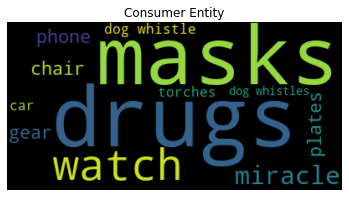

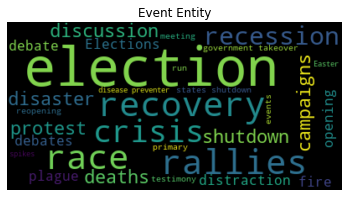

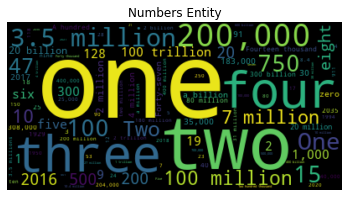

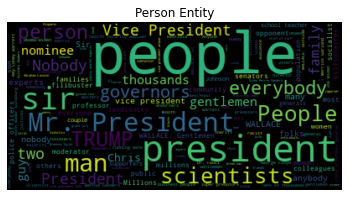

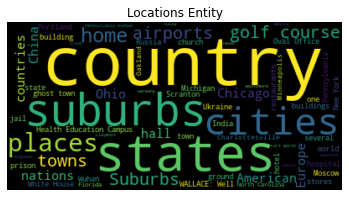

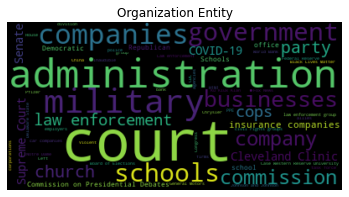

In [79]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(Counter(consumers))
# Display the generated image:
plt.title("Consumer Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud = WordCloud().generate_from_frequencies(Counter(events))
# Display the generated image:
plt.title("Event Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud = WordCloud().generate_from_frequencies(Counter(numbers))
# Display the generated image:
plt.title("Numbers Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud = WordCloud().generate_from_frequencies(Counter(persons))
# Display the generated image:
plt.title("Person Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud = WordCloud().generate_from_frequencies(Counter(locations))
# Display the generated image:
plt.title("Locations Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud = WordCloud().generate_from_frequencies(Counter(organizations))
# Display the generated image:
plt.title("Organization Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()